In [7]:
import cv2
import os

# 이미지 저장 디렉토리 생성
if not os.path.exists("captured_images"):
    os.makedirs("captured_images")

# 이미지 저장 카운터 초기화
image_count = 1

# 비디오 캡처 객체 생성
cap = cv2.VideoCapture(0)  # 0은 웹캠을 나타냅니다. 만약 동영상 파일을 사용하려면 파일 경로를 제공하세요.

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # 좌우 반전
    flipped_frame = cv2.flip(frame, 1)  # 두 번째 인수가 0이면 상하 반전, 1이면 좌우 반전입니다.

    # 화면에 표시
    cv2.imshow('Flipped Video', flipped_frame)

    # 'c' 키를 누르면 캡처
    if cv2.waitKey(1) & 0xFF == ord('c'):
        # 이미지 파일 경로
        image_path = os.path.join("captured_images", f"captured_image_{image_count}.jpg")
        
        # 이미지 저장
        cv2.imwrite(image_path, flipped_frame)
        print(f"Captured image saved as 'captured_image_{image_count}.jpg'")

        # 이미지 저장 카운터 증가
        image_count += 1

    # 'q' 키를 누르면 종료
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# 종료할 때 캡처 객체 해제 및 창 닫기
cap.release()
cv2.destroyAllWindows()


Captured image saved as 'captured_image_1.jpg'
Captured image saved as 'captured_image_2.jpg'
Captured image saved as 'captured_image_3.jpg'
Captured image saved as 'captured_image_4.jpg'
Captured image saved as 'captured_image_5.jpg'
Captured image saved as 'captured_image_6.jpg'
Captured image saved as 'captured_image_7.jpg'
Captured image saved as 'captured_image_8.jpg'
Captured image saved as 'captured_image_9.jpg'
Captured image saved as 'captured_image_10.jpg'


In [8]:
import cv2
import numpy as np

# 이미지 불러오기
image = cv2.imread('/home/addinedu/dev_ws/opencv/captured_images/mark_mingi2.jpg')

# 이미지를 그레이스케일로 변환
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# 쓰레시홀드를 이용하여 이미지 이진화

ret, thresh = cv2.threshold(gray, 235, 255, cv2.THRESH_BINARY_INV)

# 윤곽 검출
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# 윤곽을 담을 빈 이미지 생성
mask = np.zeros_like(image)

# 각 윤곽을 마스크에 그리기
cv2.drawContours(mask, contours, -1, (255, 255, 255), thickness=cv2.FILLED)

# 마스크 파일 저장
cv2.imwrite('mask2.bmp', mask)

# 결과 출력 (윤곽이 그려진 이미지와 마스크)
cv2.imshow('Contours', image)
cv2.imshow('Mask', mask)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [ ]:
import cv2

# 원본 이미지 불러오기
image = cv2.imread('original_image.jpg')

# 추출하고자 하는 부분의 좌표 설정 (x, y, width, height)
x, y, width, height = 100, 100, 200, 200

# 원하는 부분 추출
roi = image[y:y+height, x:x+width]

# 새로운 이미지 생성 (빈 캔버스)
new_image = cv2.imread('new_image.jpg')

# 새로운 이미지에 추출한 부분 삽입 (원하는 위치)
new_image[y:y+height, x:x+width] = roi

# 결과 이미지 보기
cv2.imshow('Result', new_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

# 결과 이미지 저장
cv2.imwrite('result_image.jpg', new_image)


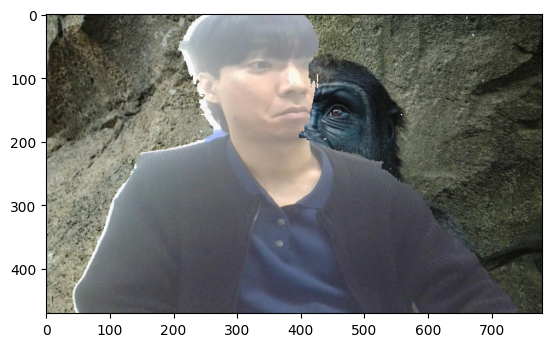

In [10]:
import cv2
import matplotlib.pyplot as plt

# src 이미지 불러오기
src = cv2.imread('/home/addinedu/dev_ws/opencv/captured_images/captured_image_9.jpg', cv2.IMREAD_COLOR)
src = cv2.cvtColor(src, cv2.COLOR_BGR2RGB)

# mask 이미지 불러오기
mask = cv2.imread("/home/addinedu/dev_ws/opencv/mask2.bmp", cv2.IMREAD_GRAYSCALE)

# dst 이미지 불러오기
dst = cv2.imread('/home/addinedu/dev_ws/opencv/gorilla.bmp', cv2.IMREAD_COLOR)
dst = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)

# 이미지 크기 조정
mask = cv2.resize(mask, (dst.shape[1], dst.shape[0]))
src = cv2.resize(src, (dst.shape[1], dst.shape[0]))

# 합성할 위치 설정 (dst 이미지의 왼쪽에 합성)
x_offset = 0
y_offset = 0

# dst 이미지에 src 이미지를 합성
result = cv2.copyTo(src, mask, dst[y_offset:y_offset+src.shape[0], x_offset:x_offset+src.shape[1]])

# 결과 이미지 출력
plt.imshow(result)
plt.show()
